# イギリスの交通事故死者数のデータ
- front : 前席における死傷者数
- PetrolPrice : ガゾリンの値段

In [1]:
library(forecast)
library(tseries)
library(ggplot2)
library(ggfortify)

In [18]:
front <- Seatbelts[, "front"]

In [19]:
write.table(front, "front.csv", )

In [4]:
front

      Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
1969  867  825  806  814  991  945 1004 1091  958  850 1109 1113
1970  925  903 1006  892  990  866 1095 1204 1029 1147 1171 1299
1971  944  874  840  893 1007  973 1097 1194  988 1077 1045 1115
1972 1005  857  879  887 1075 1121 1190 1058  939 1074 1089 1208
1973  903  916  787 1114 1014 1022 1114 1132 1111 1008  916  992
1974  731  665  724  744  910  883  900 1057 1076  919  920  953
1975  664  607  777  633  791  790  803  884  769  732  859  994
1976  704  684  671  643  771  644  828  748  767  825  810  986
1977  714  567  616  678  742  840  888  852  774  831  889 1046
1978  889  626  808  746  754  865  980  959  856  798  942 1010
1979  796  643  794  750  809  716  851  931  834  762  880 1077
1980  748  593  720  646  765  820  807  885  803  860  825  911
1981  704  691  688  714  814  736  876  829  818  942  782  823
1982  595  673  660  676  755  815  867  933  798  950  825  911
1983  619  426  475  556 

# データに対数を当てる

In [5]:
log_front <- log(front)

# とりあえずグラフと相関を可視化する

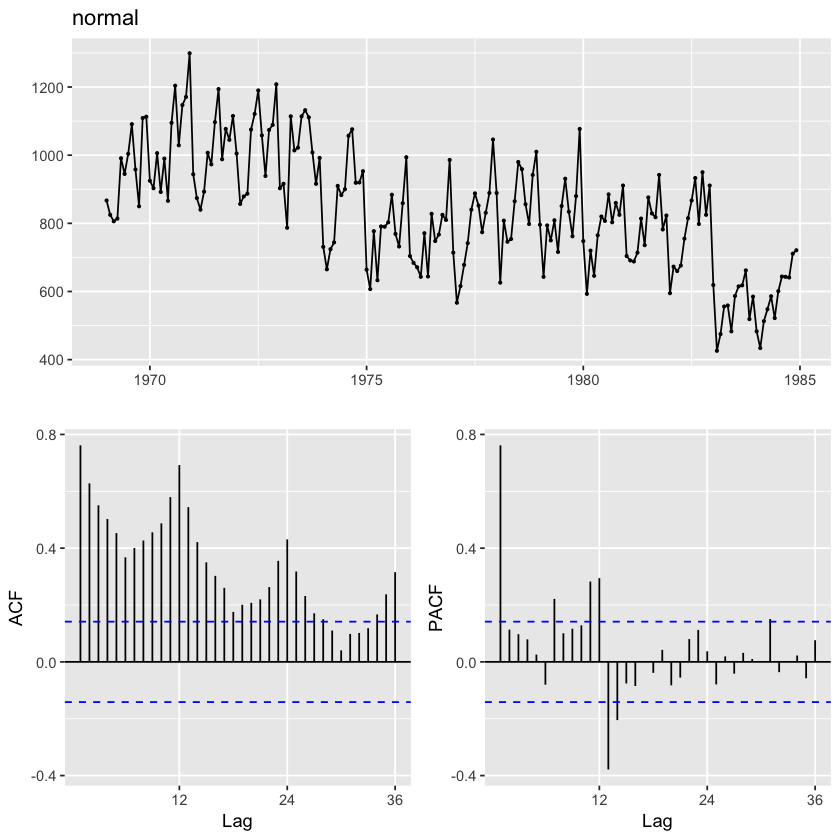

In [6]:
ggtsdisplay(front,main="normal")

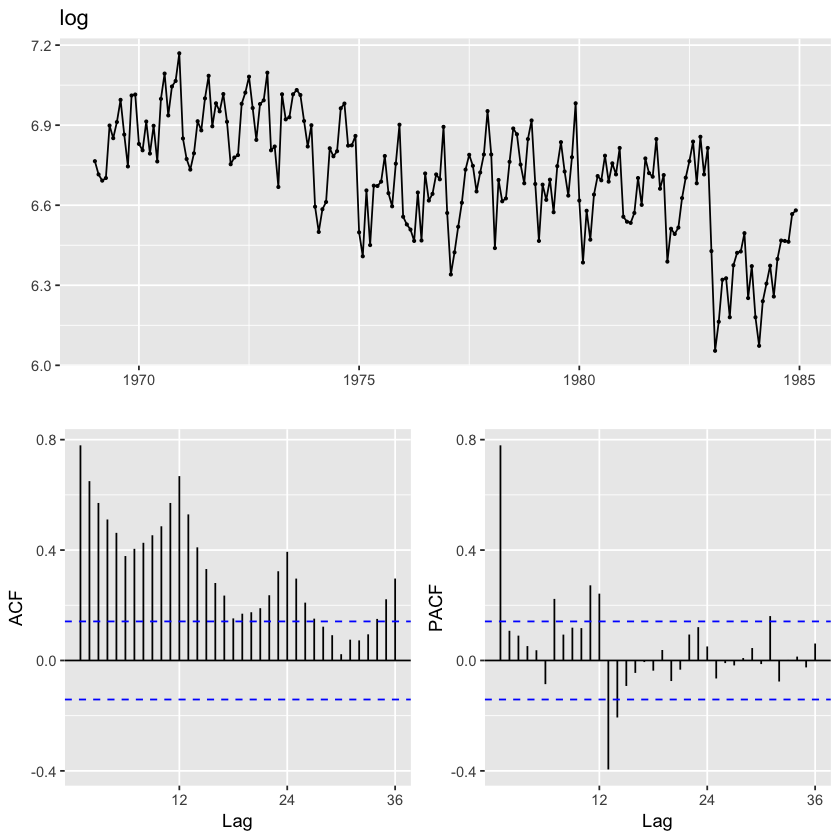

In [7]:
ggtsdisplay(log_front, main="log")

# 差分系列の作成

## 差分系列の作成

In [8]:
front

      Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
1969  867  825  806  814  991  945 1004 1091  958  850 1109 1113
1970  925  903 1006  892  990  866 1095 1204 1029 1147 1171 1299
1971  944  874  840  893 1007  973 1097 1194  988 1077 1045 1115
1972 1005  857  879  887 1075 1121 1190 1058  939 1074 1089 1208
1973  903  916  787 1114 1014 1022 1114 1132 1111 1008  916  992
1974  731  665  724  744  910  883  900 1057 1076  919  920  953
1975  664  607  777  633  791  790  803  884  769  732  859  994
1976  704  684  671  643  771  644  828  748  767  825  810  986
1977  714  567  616  678  742  840  888  852  774  831  889 1046
1978  889  626  808  746  754  865  980  959  856  798  942 1010
1979  796  643  794  750  809  716  851  931  834  762  880 1077
1980  748  593  720  646  765  820  807  885  803  860  825  911
1981  704  691  688  714  814  736  876  829  818  942  782  823
1982  595  673  660  676  755  815  867  933  798  950  825  911
1983  619  426  475  556 

In [9]:
lag(front, -1)#一つ未来にずらす

      Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
1969       867  825  806  814  991  945 1004 1091  958  850 1109
1970 1113  925  903 1006  892  990  866 1095 1204 1029 1147 1171
1971 1299  944  874  840  893 1007  973 1097 1194  988 1077 1045
1972 1115 1005  857  879  887 1075 1121 1190 1058  939 1074 1089
1973 1208  903  916  787 1114 1014 1022 1114 1132 1111 1008  916
1974  992  731  665  724  744  910  883  900 1057 1076  919  920
1975  953  664  607  777  633  791  790  803  884  769  732  859
1976  994  704  684  671  643  771  644  828  748  767  825  810
1977  986  714  567  616  678  742  840  888  852  774  831  889
1978 1046  889  626  808  746  754  865  980  959  856  798  942
1979 1010  796  643  794  750  809  716  851  931  834  762  880
1980 1077  748  593  720  646  765  820  807  885  803  860  825
1981  911  704  691  688  714  814  736  876  829  818  942  782
1982  823  595  673  660  676  755  815  867  933  798  950  825
1983  911  619  426  475 

## 原系列からラグを取ったデータを引く

In [10]:
front - lag(front, -1)
# diff(front, lag=1)
#元　- log(元)

      Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
1969       -42  -19    8  177  -46   59   87 -133 -108  259    4
1970 -188  -22  103 -114   98 -124  229  109 -175  118   24  128
1971 -355  -70  -34   53  114  -34  124   97 -206   89  -32   70
1972 -110 -148   22    8  188   46   69 -132 -119  135   15  119
1973 -305   13 -129  327 -100    8   92   18  -21 -103  -92   76
1974 -261  -66   59   20  166  -27   17  157   19 -157    1   33
1975 -289  -57  170 -144  158   -1   13   81 -115  -37  127  135
1976 -290  -20  -13  -28  128 -127  184  -80   19   58  -15  176
1977 -272 -147   49   62   64   98   48  -36  -78   57   58  157
1978 -157 -263  182  -62    8  111  115  -21 -103  -58  144   68
1979 -214 -153  151  -44   59  -93  135   80  -97  -72  118  197
1980 -329 -155  127  -74  119   55  -13   78  -82   57  -35   86
1981 -207  -13   -3   26  100  -78  140  -47  -11  124 -160   41
1982 -228   78  -13   16   79   60   52   66 -135  152 -125   86
1983 -292 -193   49   81 

In [11]:
diff(front)#lagはデフォルトで1

      Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
1969       -42  -19    8  177  -46   59   87 -133 -108  259    4
1970 -188  -22  103 -114   98 -124  229  109 -175  118   24  128
1971 -355  -70  -34   53  114  -34  124   97 -206   89  -32   70
1972 -110 -148   22    8  188   46   69 -132 -119  135   15  119
1973 -305   13 -129  327 -100    8   92   18  -21 -103  -92   76
1974 -261  -66   59   20  166  -27   17  157   19 -157    1   33
1975 -289  -57  170 -144  158   -1   13   81 -115  -37  127  135
1976 -290  -20  -13  -28  128 -127  184  -80   19   58  -15  176
1977 -272 -147   49   62   64   98   48  -36  -78   57   58  157
1978 -157 -263  182  -62    8  111  115  -21 -103  -58  144   68
1979 -214 -153  151  -44   59  -93  135   80  -97  -72  118  197
1980 -329 -155  127  -74  119   55  -13   78  -82   57  -35   86
1981 -207  -13   -3   26  100  -78  140  -47  -11  124 -160   41
1982 -228   78  -13   16   79   60   52   66 -135  152 -125   86
1983 -292 -193   49   81 

## 対数差分系列

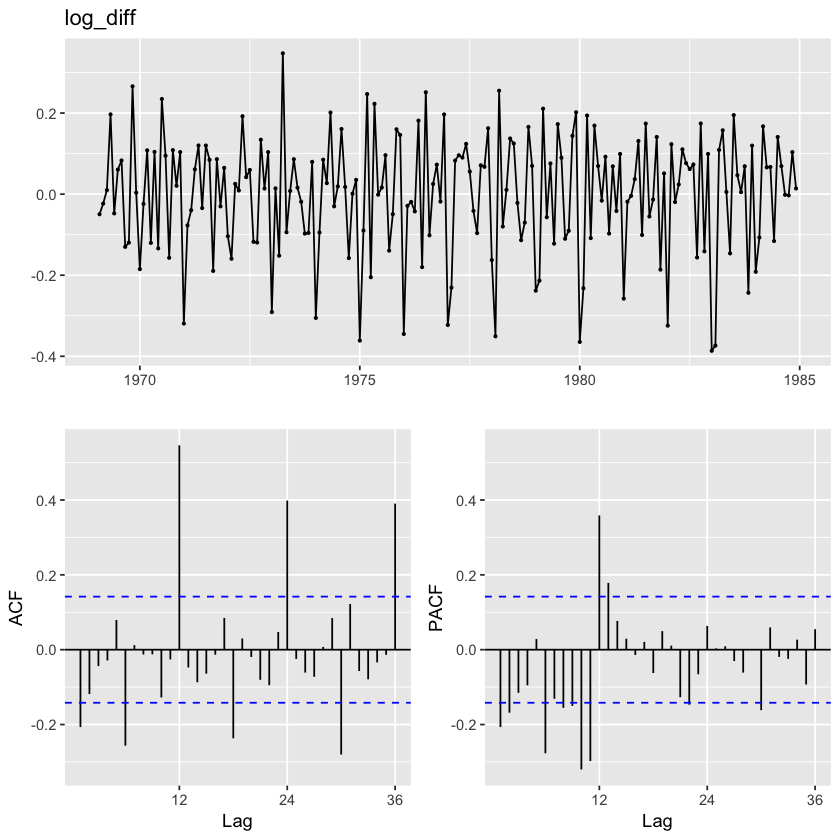

In [12]:
#対数差分系列
log_diff <- diff(log_front)
ggtsdisplay(log_diff)

## 考察
- 長期に渡って平均値が変化せず、単位根がなくなっている
- 短期の自己相関がなくなったが、不規則に絶対値の大きな自己相関が生じている
- lag = 12つまり、1年前のデータとの強い相関がわかる
- 対数差分系列の方が強く相関を見て取れる
- **季節成分があることは疑いようがない =>※「季節成分の分析をする」**

# 季節成分の取り扱い

## 月ごとに分けたグラフを描く

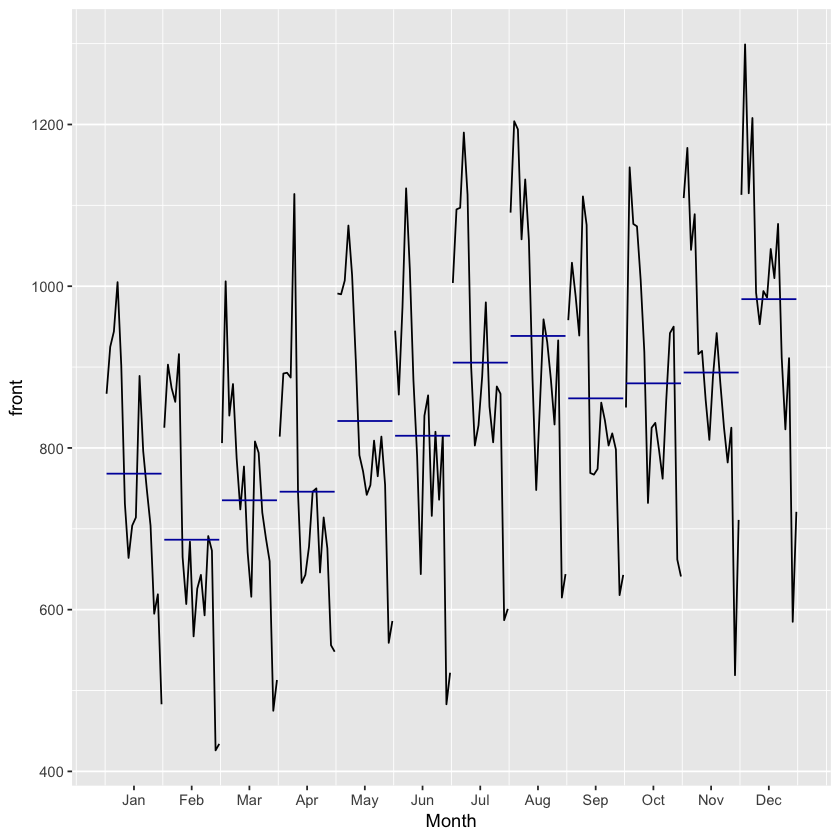

In [13]:
ggsubseriesplot(front)

## 季節成分の分析

### lag=12で差分系列

In [14]:
# 12月がもっとも死傷者が多い月とわかる
frequency(front)

[1] 12

In [20]:
#lag = 12で差分系列
#一年前のデータを引いている
diff(front, lag=frequency(front))

      Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
1970   58   78  200   78   -1  -79   91  113   71  297   62  186
1971   19  -29 -166    1   17  107    2  -10  -41  -70 -126 -184
1972   61  -17   39   -6   68  148   93 -136  -49   -3   44   93
1973 -102   59  -92  227  -61  -99  -76   74  172  -66 -173 -216
1974 -172 -251  -63 -370 -104 -139 -214  -75  -35  -89    4  -39
1975  -67  -58   53 -111 -119  -93  -97 -173 -307 -187  -61   41
1976   40   77 -106   10  -20 -146   25 -136   -2   93  -49   -8
1977   10 -117  -55   35  -29  196   60  104    7    6   79   60
1978  175   59  192   68   12   25   92  107   82  -33   53  -36
1979  -93   17  -14    4   55 -149 -129  -28  -22  -36  -62   67
1980  -48  -50  -74 -104  -44  104  -44  -46  -31   98  -55 -166
1981  -44   98  -32   68   49  -84   69  -56   15   82  -43  -88
1982 -109  -18  -28  -38  -59   79   -9  104  -20    8   43   88
1983   24 -247 -185 -120 -196 -332 -280 -318 -180 -288 -306 -326
1984 -136    8   38   -8 

### 季節差分をとる

In [24]:
#　対数差分系列にさらに季節性でlag＝１２をとる
seas_log_diff <- diff(log_diff, lag=frequency(log_diff))

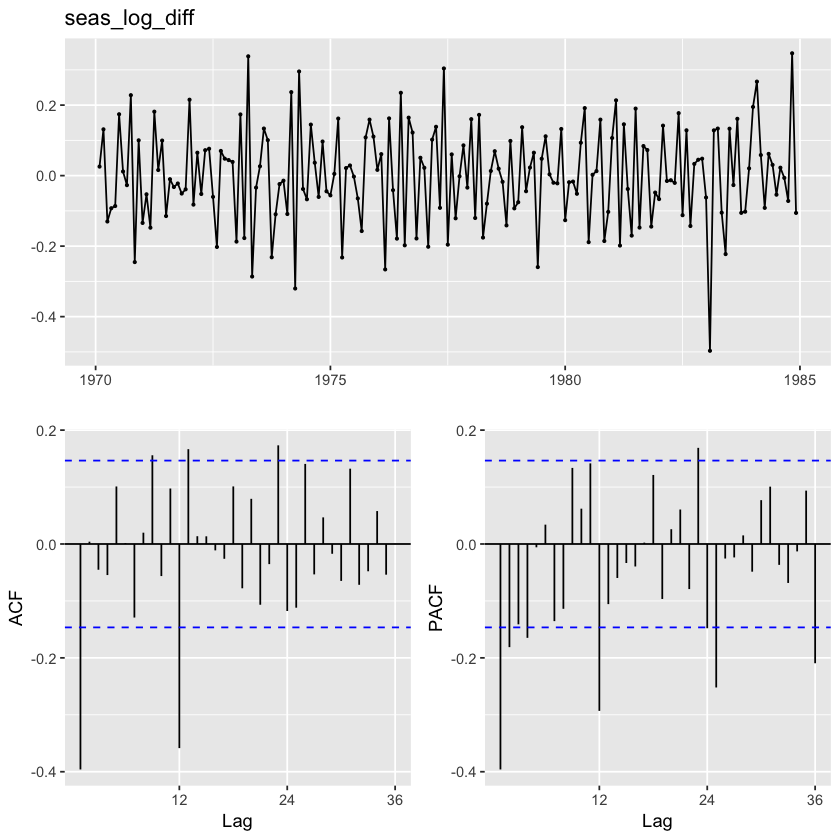

In [28]:
#季節差分系列
ggtsdisplay(seas_log_diff)

## 考察
- １２ヶ月の差分をとっても自己相関が大きく残ったまま
- 季節階差をとっても季節の影響は消えるものではない
- **差分をとるとデータが少なくなることの注意**

# 自己相関とコレログラム

## 自己相関を数値で得る
- Rだとacf関数
- 標準だとグラフまで描かれるので、plot=F
- 偏自己相関だとpacf

In [29]:
acf(seas_log_diff, plot=F, lag.max=12)


Autocorrelations of series ‘seas_log_diff’, by lag

0.0000 0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 
 1.000 -0.396  0.004 -0.045 -0.055  0.101  0.002 -0.129  0.020  0.156 -0.056 
0.9167 1.0000 
 0.097 -0.359 

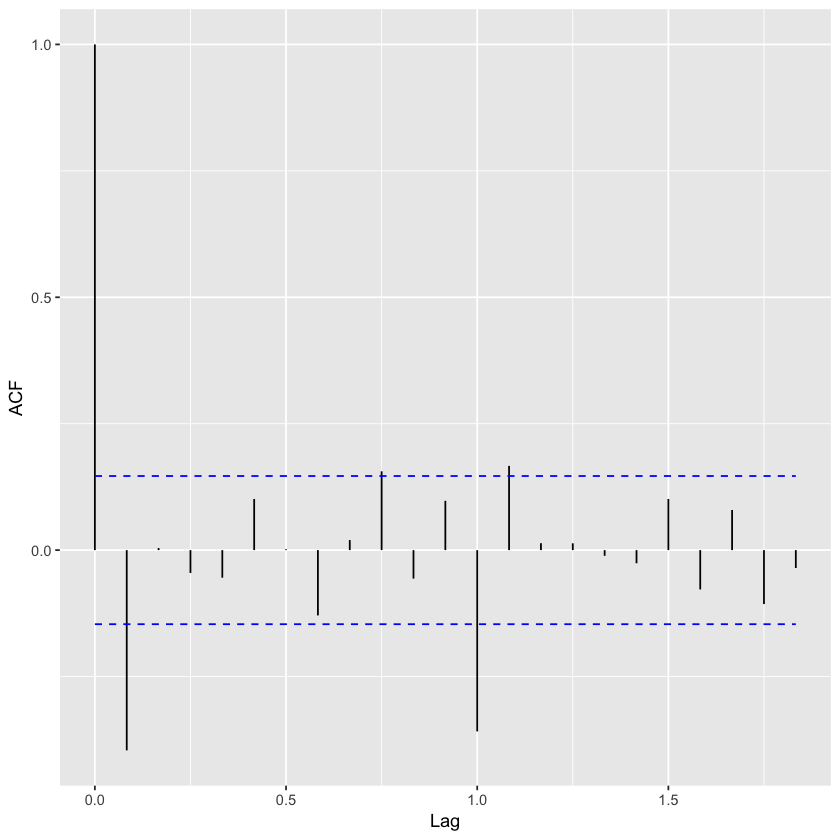

In [32]:
autoplot(
    acf(seas_log_diff, plot=F)
)

# 訓練データとテストデータに分ける
- PetrolPrice: 石油価格
- law: 法律の施行の有無

In [38]:
Seatbelts_log <- Seatbelts[, c("front", "PetrolPrice", "law")]

In [49]:
# frontに対数
Seatbelts_log[,"front"] <- log(Seatbelts[,"front"]) 

In [50]:
# PetroPriceに対数
Seatbelts_log[,"PetrolPrice"]  <- log(Seatbelts[,"PetrolPrice"])

In [52]:
#train/testに分割
train <- window(Seatbelts_log, end=c(1983, 12))
test <- window(Seatbelts_log, end=c(1984, 1))

In [53]:
petro_law <- train[,c("PetrolPrice", "law")]

# ARIMAモデルの推定

In [56]:
model_sarimax <- Arima(
    y = train[,"front"],
    order = c(1 ,1 ,1),
    seasonal = list(order = c(1, 0, 0)),# 季節成分の次数設定
    xreg = petro_law # 説明変数の指定
)

In [57]:
model_sarimax

Series: train[, "front"] 
Regression with ARIMA(1,1,1)(1,0,0)[12] errors 

Coefficients:
         ar1      ma1    sar1  PetrolPrice      law
      0.2589  -0.9503  0.6877      -0.3464  -0.3719
s.e.  0.0826   0.0303  0.0548       0.0955   0.0467

sigma^2 estimated as 0.009052:  log likelihood=165.33
AIC=-318.66   AICc=-318.18   BIC=-299.54

------
## 説明
- Coefficientsに各係数の値とその係数の標準誤差が入る

# 差分系列とARIMAの次数の関係

In [58]:
Arima(
    y = log_diff, order=c(1,0,0),
    include.mean=F)

Series: log_diff 
ARIMA(1,0,0) with zero mean 

Coefficients:
          ar1
      -0.2058
s.e.   0.0706

sigma^2 estimated as 0.0202:  log likelihood=102.1
AIC=-200.21   AICc=-200.15   BIC=-193.7

In [59]:
Arima(
    y = log_front, order=c(1,1,0))

Series: log_front 
ARIMA(1,1,0) 

Coefficients:
          ar1
      -0.2058
s.e.   0.0706

sigma^2 estimated as 0.0202:  log likelihood=102.1
AIC=-200.21   AICc=-200.15   BIC=-193.7

In [ ]:
Ari